# 3. Inference

Read in the packages, data and exclude an unused variable.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 3.2 Testing examples

Read in the Galapagos data

In [2]:
gala = pd.read_csv("data/gala.csv", index_col=0)
gala.drop('Endemics', axis=1, inplace=True)
gala.head()

,Species,Area,Elevation,Nearest,Scruz,Adjacent
Baltra,58,25.09,346,0.6,0.6,1.84
Bartolome,31,1.24,109,0.6,26.3,572.33
Caldwell,3,0.21,114,2.8,58.7,0.78
Champion,25,0.10,46,1.9,47.4,0.18
Coamano,2,0.05,77,1.9,1.9,903.82


Fit the model:

In [3]:
lmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Species   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     15.70
Date:                Tue, 23 Jun 2020   Prob (F-statistic):           6.84e-07
Time:                        17:01:35   Log-Likelihood:                -162.54
No. Observations:                  30   AIC:                             337.1
Df Residuals:                      24   BIC:                             345.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0682     19.154      0.369      0.715     -32.464      46.601
Area          -0.0239      0.022     -1.068      0.296      -0.070       0.022
Elevation      0.3195      0.054      5.953      0.000       0.209       0.430
Nearest        0.0091      1.054      0.009      0.993      -2.166       2.185
Scruz         -0.2405      0.215     -1.117      0.275      -0.685       0.204
Adjacent      -0.0748      0.018     -4.226      0.000      -0.111      -0.038
==============================================================================
Omnibus:                       12.683   Durbin-Watson:                   2.476
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.498
Skew:                           1.136   Prob(JB):                      0.00117
Kurtosis:                       5.374   Cond. No.                     1.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Total sum of squares and residual sum of squares

In [4]:
lmod.centered_tss, lmod.ssr

(381081.36666666664, 89231.36633005117)

Degrees of freedom for the numerator and denominator of the F-test

In [5]:
lmod.df_model, lmod.df_resid

(5.0, 24.0)

Mean square of numerator and denominator

In [6]:
lmod.mse_model, lmod.mse_resid

(58370.0000673231, 3717.9735970854654)

F-statistic reproduced

In [7]:
lmod.mse_model/ lmod.mse_resid

15.699412204831035

Compute p-value

In [8]:
1-sp.stats.f.cdf(lmod.fvalue, lmod.df_model, lmod.df_resid)

6.837892995159578e-07

F-test for comparing two models. (Turn off the warnings about NaNs in the output - we don't care).

In [9]:
%%capture --no-display
lmods = smf.ols(formula='Species ~ Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
sm.stats.anova_lm(lmods,lmod)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,25.0,93469.08399,0.0,NaN,NaN,NaN
1,24.0,89231.36633,1.0,4237.71766,1.139792,0.296318


In [10]:
%%capture --no-display
lmods = smf.ols(formula='Species ~ Elevation + Nearest + Scruz', data=gala).fit()
sm.stats.anova_lm(lmods,lmod)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,26.0,158291.628568,0.0,NaN,NaN,NaN
1,24.0,89231.366330,2.0,69060.262238,9.287352,0.00103


Use I() notation to test replacing by the sum of two variables

In [11]:
%%capture --no-display
lmods = smf.ols(formula='Species ~ I(Area+Adjacent) + Elevation + Nearest + Scruz', data=gala).fit()
sm.stats.anova_lm(lmods,lmod)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,25.0,109591.120801,0.0,NaN,NaN,NaN
1,24.0,89231.366330,1.0,20359.754471,5.476035,0.027926


Need to use glm function to get offset functionality

In [12]:
lmod = smf.glm(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
lmods = smf.glm(formula='Species ~ Area + Nearest + Scruz + Adjacent', offset=(0.5*gala['Elevation']), data=gala).fit()
fstat = (lmods.deviance-lmod.deviance)/(lmod.deviance/lmod.df_resid)
fstat

11.318196837955563

In [13]:
1-sp.stats.f.cdf(fstat, 1, lmod.df_resid)

0.002573836486092773

Compute t-statistic and corresponding p-value

In [14]:
lmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
tstat=(lmod.params['Elevation']-0.5)/lmod.bse['Elevation']
tstat, 2*sp.stats.t.cdf(tstat, lmod.df_resid)

(-3.3642527904358723, 0.0025738364860927285)

In [15]:
tstat**2

11.318196837955554

## 3.3 Permutation tests

Permutation of the response

In [16]:
lmod = smf.ols(formula='Species ~ Nearest + Scruz', data=gala).fit()
np.random.permutation(gala.Species)

array([  2,   3, 444, 108, 237, 285,  31,  21,  58,  62,  51,   8,  40,
        70,  10,  16,  25,   2,  58,  18, 104,   2, 280,  24,  44,  97,
        93,  12, 347,   5], dtype=int64)

Compute the f-statistic for a sample of permutations

In [17]:
fstats = np.zeros(4000)
for i in range(0,4000):
    gala['ysamp'] = np.random.permutation(gala.Species)
    lmodi = smf.ols(formula='ysamp ~ Nearest + Scruz', data=gala).fit()
    fstats[i] = lmodi.fvalue

Proportion of permuted f-statistics that exceed the observed value

In [18]:
np.mean(fstats > lmod.fvalue)

0.5615

Which is close to the observed p-value

In [19]:
lmod.f_pvalue

0.5549254563908441

Do t-test with permutation

In [20]:
tstats = np.zeros(4000)
for i in range(0, 4000):
    gala['ssamp'] = np.random.permutation(gala.Scruz)
    lmodi = smf.ols(formula='Species ~ Nearest + ssamp', data=gala).fit()
    tstats[i] = lmodi.tvalues[2]

Proportion of permuted t-statistcs which exceed the observed t-statistic in absolute value

In [21]:
np.mean(np.fabs(tstats) > np.fabs(lmod.tvalues[2]))

0.277

Very close to observed p-value:

In [22]:
lmod.pvalues[2]

0.2833295186486556

## 3.5 Confidence intervals for beta

In [23]:
lmod = smf.ols(formula='Species ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
qt = np.array(sp.stats.t.interval(0.95,24))
lmod.params[1] + lmod.bse[1]*qt

array([-0.0702158 ,  0.02233912])

In [24]:
lmod.conf_int()

,0,1
Intercept,-32.464101,46.600542
Area,-0.070216,0.022339
Elevation,0.208710,0.430219
Nearest,-2.166486,2.184774
Scruz,-0.685093,0.204044
Adjacent,-0.111336,-0.038273


Drawing the confidence ellipses appears to require some effort in coding

## 3.6 Bootstrapped Confidence Intervals

Bootstrap the residuals

In [25]:
breps = 4000
coefmat = np.empty((breps,6))
resids = lmod.resid
preds = lmod.predict()
for i in range(0,breps):
    gala['ysamp'] = preds + np.random.choice(resids,30)
    lmodi = smf.ols(formula='ysamp ~ Area + Elevation + Nearest + Scruz  + Adjacent', data=gala).fit()
    coefmat[i,:] = lmodi.params

Turn into pandas dataframe and add columns

In [26]:
coefmat = pd.DataFrame(coefmat, columns=("intercept", "area","elevation","nearest","Scruz","adjacent"))

Compute the quantiles by column for bootstrap confidence intervals

In [27]:
coefmat.quantile((0.025,0.975))

,intercept,area,elevation,nearest,Scruz,adjacent
0.025,-24.626108,-0.061615,0.227082,-1.679918,-0.599860,-0.104276
0.975,42.148866,0.020538,0.416893,2.077039,0.179131,-0.040097


Plot the kernel density estimate

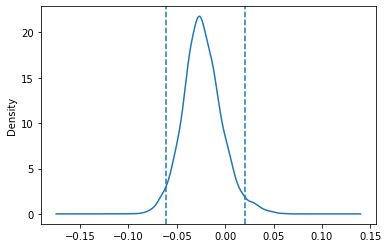

In [28]:
coefmat.area.plot.density()
xci = coefmat.area.quantile((0.025,0.975)).ravel()
plt.axvline(x=xci[0], linestyle='--')
plt.axvline(x=xci[1], linestyle='--')            
plt.show()